In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimpy import skim
import seaborn as sns

# About the dataset
The dataset contains the number of dengue cases in the Philippines in 2016 to 2021. The data was obtained from the Humanitarian Data Exchange (HDX) platform. The dataset contains the following columns:
- date: The date of the report (object) -> date_time
- Region: The region where the cases were reported (object)
- cases: The number of cases reported (int)
- deaths: The number of deaths reported (int)
- loc: The location where the cases were reported (object)
- year: The year of the report (int)

In [11]:
# Load the data
file = "data/dengue/hdx/doh-epi-dengue-cases-2016.csv"
df = pd.read_csv(file, skiprows=[1,2])
df.head()

,loc,cases,deaths,date,Region,year
0,ALBAY,13,0,17/01/2016,REGION V-BICOL REGION,2016
1,ALBAY,9,0,24/01/2016,REGION V-BICOL REGION,2016
2,ALBAY,14,0,31/01/2016,REGION V-BICOL REGION,2016
3,ALBAY,9,0,07/02/2016,REGION V-BICOL REGION,2016
4,ALBAY,17,0,14/02/2016,REGION V-BICOL REGION,2016


In [12]:
df.info()
# Fix data type of column
numerical_columns = ['cases', 'deaths']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   loc     6328 non-null   object
 1   cases   6328 non-null   int64 
 2   deaths  6328 non-null   int64 
 3   date    6328 non-null   object
 4   Region  6328 non-null   object
 5   year    6328 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 296.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   loc     6328 non-null   object        
 1   cases   6328 non-null   int64         
 2   deaths  6328 non-null   int64         
 3   date    6328 non-null   datetime64[ns]
 4   Region  6328 non-null   object        
 5   year    6328 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 296.8+ KB


In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6328   │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ cases           │    0 │      0 │    33.11 │   57.39 │      0 │      5 │     14 │     37 │   934 │    ▇    │  │
│ │ deaths          │    0 │      0 │    1.284 │   9.503 │      0 │      0 │      0 │      0 │   205 │    ▇    │  │
│ │ year            │    0 │      0 │     2016 │       0 │   2016 │   2016 │   2016 │   2016 │  2016 │     ▇   │  │
│ └─────────────────┴──────┴────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2016-01-10      │     2016-12-25      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ loc                       │       0 │          0 │                          1.8 │                    11181 │  │
│ │ Region                    │       0 │          0 │                          2.5 │                    15772 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

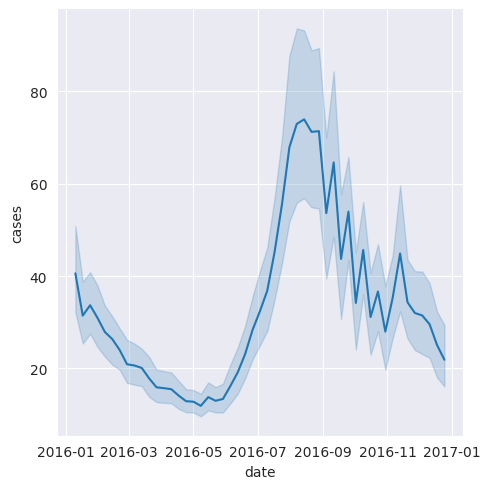

In [14]:
sns.relplot(data=df, x='date', y='cases', kind='line')

In [15]:
# filter the dataset to contain only those in region VI
df_vi = df[df['Region'].str.contains('VI')]
df_vi

,loc,cases,deaths,date,Region,year
1988,AKLAN,50,0,2016-01-10,REGION VI-WESTERN VISAYAS,2016
1989,AKLAN,32,0,2016-01-17,REGION VI-WESTERN VISAYAS,2016
1990,AKLAN,32,0,2016-01-24,REGION VI-WESTERN VISAYAS,2016
1991,AKLAN,22,0,2016-01-31,REGION VI-WESTERN VISAYAS,2016
1992,AKLAN,27,0,2016-02-07,REGION VI-WESTERN VISAYAS,2016
...,...,...,...,...,...,...
3156,TACLOBAN,0,0,2016-11-27,REGION VII-EASTERN VISAYAS,2016
3157,TACLOBAN,1,0,2016-12-04,REGION VII-EASTERN VISAYAS,2016
3158,TACLOBAN,4,0,2016-12-11,REGION VII-EASTERN VISAYAS,2016
3159,TACLOBAN,1,0,2016-12-18,REGION VII-EASTERN VISAYAS,2016


In [16]:
# filter to only contain iloilo
df_iloilo = df_vi[df_vi['loc'].str.lower().str.contains('iloilo')]
df_iloilo

,loc,cases,deaths,date,Region,year
2243,ILOILO,41,1,2016-01-10,REGION VI-WESTERN VISAYAS,2016
2244,ILOILO,53,0,2016-01-17,REGION VI-WESTERN VISAYAS,2016
2245,ILOILO,57,0,2016-01-24,REGION VI-WESTERN VISAYAS,2016
2246,ILOILO,65,0,2016-01-31,REGION VI-WESTERN VISAYAS,2016
2247,ILOILO,53,0,2016-02-07,REGION VI-WESTERN VISAYAS,2016
...,...,...,...,...,...,...
2340,ILOILO CITY,17,0,2016-11-27,REGION VI-WESTERN VISAYAS,2016
2341,ILOILO CITY,14,0,2016-12-04,REGION VI-WESTERN VISAYAS,2016
2342,ILOILO CITY,13,0,2016-12-11,REGION VI-WESTERN VISAYAS,2016
2343,ILOILO CITY,4,0,2016-12-18,REGION VI-WESTERN VISAYAS,2016


# For Open Weather Data

In [9]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


In [10]:

df_rain = pd.read_json('weather_data.jsonl', lines=True)
df_rain.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather,rain
0,1293811200,1293833259,1293874683,298.61,299.61,1008,92,297.21,99,3.81,31,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN
1,1293897600,1293919682,1293961115,298.52,299.49,1009,91,296.94,100,6.70,39,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.63}
2,1293984000,1294006105,1294047547,298.21,299.15,1011,91,296.64,100,6.29,38,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.17}
3,1294070400,1294092527,1294133979,297.98,298.82,1011,88,295.86,31,7.56,34,"[{'id': 802, 'main': 'Clouds', 'description': ...",NaN
4,1294156800,1294178948,1294220412,298.23,299.04,1011,86,295.72,73,6.60,35,"[{'id': 803, 'main': 'Clouds', 'description': ...",NaN


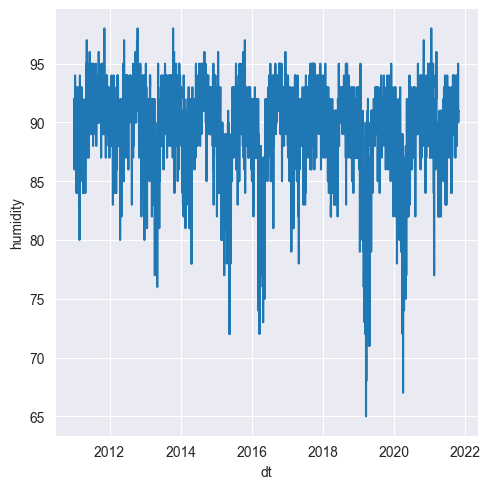

In [14]:
df_rain['dt'] = pd.to_datetime(df_rain['dt'], unit='s')
sns.relplot(data=df_rain, x='dt', y='humidity', kind='line')

In [15]:
df_rain

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,wind_speed,wind_deg,weather,rain
0,2010-12-31 16:00:00,1293833259,1293874683,298.61,299.61,1008,92,297.21,99,3.81,31,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN
1,2011-01-01 16:00:00,1293919682,1293961115,298.52,299.49,1009,91,296.94,100,6.70,39,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.63}
2,2011-01-02 16:00:00,1294006105,1294047547,298.21,299.15,1011,91,296.64,100,6.29,38,"[{'id': 500, 'main': 'Rain', 'description': 'l...",{'1h': 0.17}
3,2011-01-03 16:00:00,1294092527,1294133979,297.98,298.82,1011,88,295.86,31,7.56,34,"[{'id': 802, 'main': 'Clouds', 'description': ...",NaN
4,2011-01-04 16:00:00,1294178948,1294220412,298.23,299.04,1011,86,295.72,73,6.60,35,"[{'id': 803, 'main': 'Clouds', 'description': ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,2021-10-25 16:00:00,1635197981,1635240452,299.70,299.70,1010,92,298.29,93,2.16,21,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN
3953,2021-10-26 16:00:00,1635284392,1635326831,300.38,304.55,1011,90,298.59,72,3.52,26,"[{'id': 803, 'main': 'Clouds', 'description': ...",NaN
3954,2021-10-27 16:00:00,1635370803,1635413211,299.59,299.59,1012,91,298.00,99,3.98,37,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN
3955,2021-10-28 16:00:00,1635457215,1635499591,299.72,299.72,1012,91,298.13,91,4.21,25,"[{'id': 804, 'main': 'Clouds', 'description': ...",NaN


In [16]:
@interact
def plot_rainfall(x=df_rain.columns, y=df_rain.columns):
    sns.relplot(data=df_rain, x=x, y=y, kind='line')
    plt.show()
    

interactive(children=(Dropdown(description='x', options=('dt', 'sunrise', 'sunset', 'temp', 'feels_like', 'pre…

## Cleaning the OpenWeather Data
Cleaning will be done in the [openweather_data_cleaning.ipynb](openweather_data_cleaning.ipynb) notebook.

# EDA for the cleaned OpenWeather Data and Dengue Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_dengue = pd.read_csv('data/dengue/hdx/doh-epi-dengue-cases-iloilo.csv')
df_dengue.head()

,loc,cases,deaths,date,Region,year
0,ILOILO CITY,19,0.0,10/01/2016,REGION VI-WESTERN VISAYAS,2016
1,ILOILO CITY,23,0.0,17/01/2016,REGION VI-WESTERN VISAYAS,2016
2,ILOILO CITY,31,0.0,24/01/2016,REGION VI-WESTERN VISAYAS,2016
3,ILOILO CITY,26,0.0,31/01/2016,REGION VI-WESTERN VISAYAS,2016
4,ILOILO CITY,10,1.0,07/02/2016,REGION VI-WESTERN VISAYAS,2016


In [4]:
df_openweather = pd.read_csv('data/openweather/weather_data.csv')
df_openweather['dt'] = pd.to_datetime(df_openweather['dt'])
df_openweather.head()

,dt,temp,pressure,humidity,rain
0,2011-01-01,25.46,1008,92,0.00
1,2011-01-02,25.37,1009,91,0.63
2,2011-01-03,25.06,1011,91,0.17
3,2011-01-04,24.83,1011,88,0.00
4,2011-01-05,25.08,1011,86,0.00


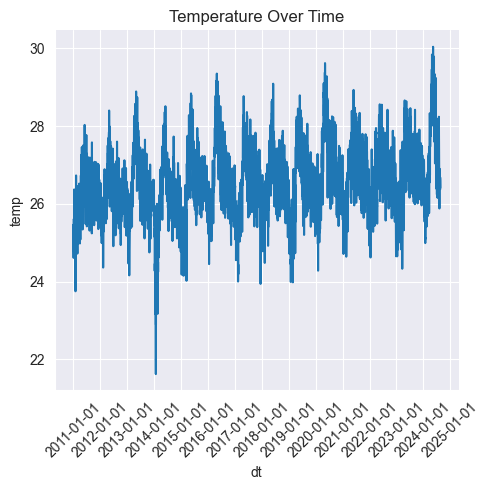

In [5]:
sns.relplot(data=df_openweather, x='dt', y='temp', kind='line')
plt.figsize=(15, 5)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.title("Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df_weather_summary = pd.read_json("weather_data_summary.jsonl", lines=True)

In [10]:
df_weather_summary.head()

,lat,lon,tz,date,units,cloud_cover,humidity,precipitation,temperature,pressure,wind
0,10.72015,122.562106,+08:00,2010-12-31,standard,{'afternoon': 95.35},{'afternoon': 81.59},{'total': 5.95},"{'min': 296.87, 'max': 301.39, 'afternoon': 30...",{'afternoon': 1008.26},"{'max': {'speed': 4.29, 'direction': 41.25}}"
1,10.72015,122.562106,+08:00,2011-01-01,standard,{'afternoon': 83.58},{'afternoon': 87.66},{'total': 4.37},"{'min': 297.02, 'max': 300.22, 'afternoon': 29...",{'afternoon': 1008.2},"{'max': {'speed': 6.43, 'direction': 37.08}}"
2,10.72015,122.562106,+08:00,2011-01-02,standard,{'afternoon': 100.0},{'afternoon': 89.85},{'total': 50.81},"{'min': 297.32, 'max': 298.95, 'afternoon': 29...",{'afternoon': 1009.91},"{'max': {'speed': 8.16, 'direction': 45.57}}"
3,10.72015,122.562106,+08:00,2011-01-03,standard,{'afternoon': 100.0},{'afternoon': 85.68},{'total': 5.23},"{'min': 296.96, 'max': 299.15, 'afternoon': 29...",{'afternoon': 1011.01},"{'max': {'speed': 8.63, 'direction': 44.8}}"
4,10.72015,122.562106,+08:00,2011-01-04,standard,{'afternoon': 60.47},{'afternoon': 81.46},{'total': 0.05},"{'min': 296.64, 'max': 300.15, 'afternoon': 29...",{'afternoon': 1010.78},"{'max': {'speed': 9.7, 'direction': 41.01}}"


In [7]:
df_weather_summary = pd.read_csv("data/openweather/weather_data_summary.csv")
df_weather_summary.head()

,date,precipitation,max_temp,min_temp
0,2010-12-31,5.95,301.39,296.87
1,2011-01-01,4.37,300.22,297.02
2,2011-01-02,50.81,298.95,297.32
3,2011-01-03,5.23,299.15,296.96
4,2011-01-04,0.05,300.15,296.64


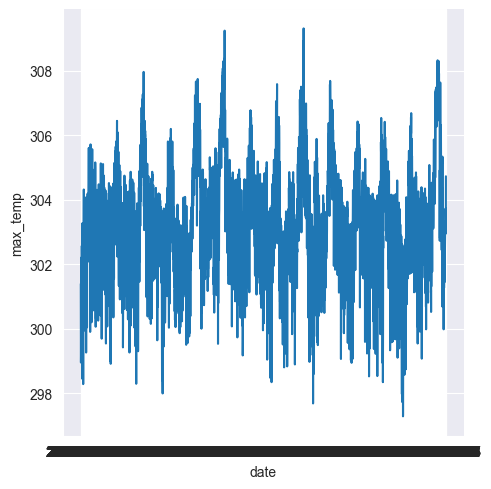

In [8]:
sns.relplot(data=df_weather_summary, x='date', y='max_temp', kind='line')